In [1]:
import cv2
import matplotlib.pyplot as plt


In [2]:
data=input("Enter the path of image file or file name:")

Enter the path of image file or file name:Mrunal.jpg


# 1.Loading of Image into the program

In [3]:
im=cv2.imread(data)
# height, width, number of channels in image  
height = im.shape[0]  
width = im.shape[1]  
channels = im.shape[2]  
size1 = im.size  
print('Image Height       : ',height)  
print('Image Width        : ',width)  
print('Number of Channels : ',channels)  
print('Image Size  :', size1) 

if height>650 and width>500:
    scale = 10 
    width = int(im.shape[1] * scale / 100)  
    height = int(im.shape[0] * scale / 100)  
    dim = (width, height)  
    # resize image  
    img = cv2.resize(im, dim, interpolation=cv2.INTER_AREA)
else:
    img=cv2.imread(data)
    

Image Height       :  414
Image Width        :  330
Number of Channels :  3
Image Size  : 409860


In [4]:
#displaying of image using cv2 library in new window
cv2.imshow("Loaded Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 2.Conversion of image to grayscale image

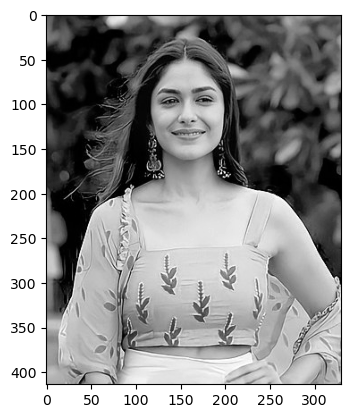

In [5]:
#displaying using matplotlib library
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")

# 3.Inverting the colors of the grayscale image

In [6]:
#lets first check maximum 
print(img.max())
print(img.min())

255
0


In [7]:
#now we invert the image 
invert=255-img

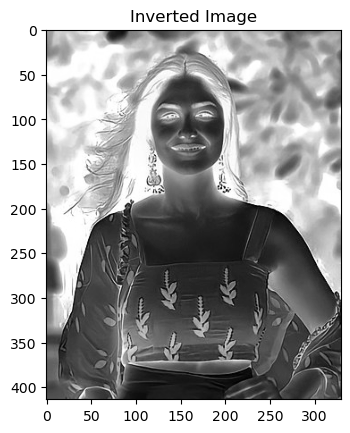

In [8]:
plt.title("Inverted Image")
plt.imshow(invert,cmap="gray")

# 4.Applying gaussian Blur 

In [9]:
#this is used to smoothning the image 
blur=cv2.GaussianBlur(invert,ksize=(15,15),sigmaX=0,sigmaY=0)

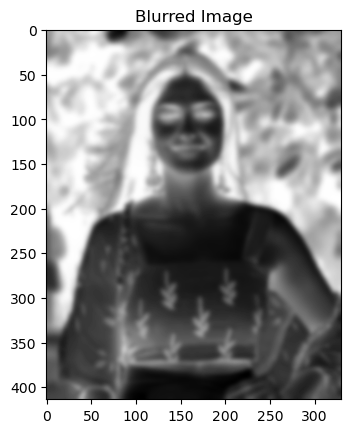

In [10]:
plt.title("Blurred Image")
plt.imshow(blur,cmap="gray")

In [11]:
#Now in next step we will detect edge from the image 

# 5.Canny edge detection

In [12]:
cedge=cv2.Canny(invert,100,150)

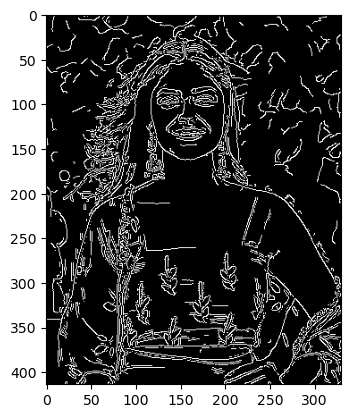

In [13]:
plt.imshow(cedge,cmap="gray")

# 6.Applying thresholding operation

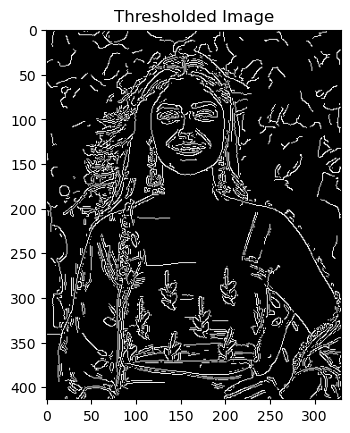

In [14]:
retval, threshold = cv2.threshold(cedge, 120, 255, cv2.THRESH_BINARY) 
plt.title("Thresholded Image")
plt.imshow(threshold,cmap="gray")

# 7.Dilation of the image

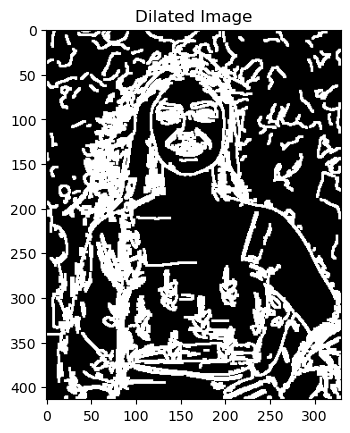

In [15]:
import numpy as np
kernel = np.ones((3,3), np.uint8)
dimg = cv2.dilate(threshold, kernel, iterations=1) 
plt.title("Dilated Image")
plt.imshow(dimg,cmap="gray")

# 8.Combining of the Dilated Binary Image with negative Grayscale image

In [16]:
dodge=lambda image,mask:cv2.divide(image,mask,scale=256)
blended=dodge(invert,dimg)

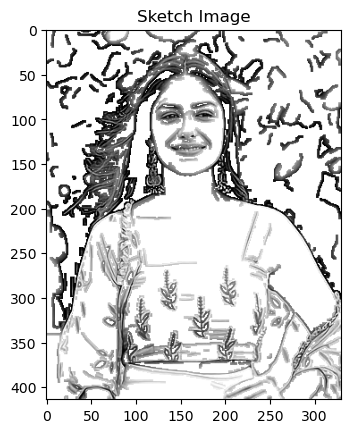

In [21]:
plt.title("Sketch Image")
plt.imshow(255-blended,cmap="gray")